In [253]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.linear_model import Perceptron
import pandas as pd
np.random.seed(42)

In [254]:
data= pd.read_csv("data_clean.csv")

In [255]:
y = data.diagnosis.values
x_data = data.drop(['diagnosis'], axis = 1)

# Chuẩn hóa 
x = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))
#data.sample(frac=1, random_state=42, replace=True)

In [256]:
x_train, x_test, y_train, y_test = train_test_split(
	x, y, test_size = 0.15, random_state = 42)

#x_train = x_train.T
#x_test = x_test.T
#y_train = y_train.T
#y_test = y_test.T

print("x train: ", x_train.shape)
print("x test: ", x_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)


x train:  (483, 31)
x test:  (86, 31)
y train:  (483,)
y test:  (86,)


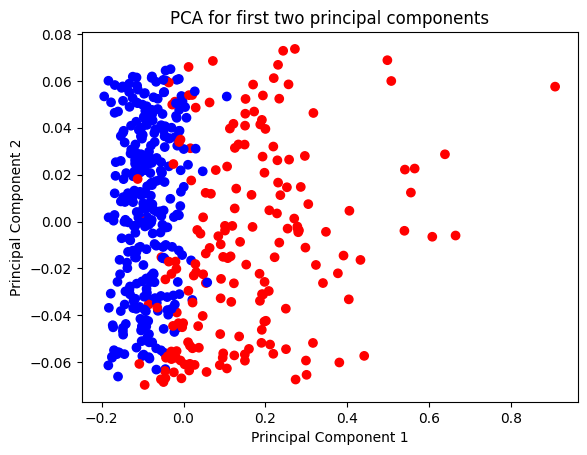

In [257]:
from sklearn.decomposition import PCA

# Sử dụng PCA để giảm chiều dữ liệu xuống còn 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train)

# Vẽ biểu đồ scatter plot với 2 thành phần chính từ PCA
color = ['red' if value == 1 else 'blue' for value in y_train]
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', color=color)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for first two principal components')
plt.show()


Xây Dựng Thuật Toán

In [258]:
def h(w, x):    
    return np.sign(np.dot(w, x))

In [259]:
def has_converged(X, y, w):    
    return np.array_equal(h(w, X), y) 

In [260]:
def perceptron(X, y, w_init):
    count = 0
    N = X.shape[0]
    d = X.shape[1]
    w = w_init
    mis_point_before = []
    mis_point = []
    while True:
        mis_point_before = mis_point.copy()
        mis_point.clear()
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[i]
            yi = y[i]
            Hk = h(w, xi)
            if  Hk[0] != yi:
                mis_point.append(i)
                w_new = w + yi * xi 
                w = w_new
        count+=1
        if len(mis_point) == 0 or len(mis_point) == len(mis_point_before):
            break
    return (w, mis_point, count)

In [261]:
y_train_arr = [-1 if i == 0 else 1 for i in y_train]
X_train_arr = x_train.values
d = x_train.shape[1]
w_init = np.random.randn(1, d)


In [262]:
w_init

array([[ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
        -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
        -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
        -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
         1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
         0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
        -0.60170661]])

In [263]:
h(w_init, x_train.iloc[2])[0]

-1.0

In [264]:
(w, m, count) = perceptron(X_train_arr, y_train_arr, w_init)

In [265]:
count

19

In [266]:
w.shape

(1, 31)

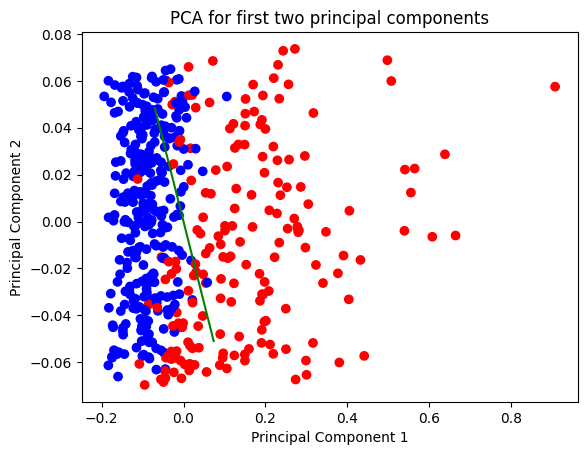

In [267]:
from sklearn.decomposition import PCA
import numpy as np

# Sử dụng PCA để giảm chiều dữ liệu xuống còn 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train)

# Vẽ biểu đồ scatter plot với 2 thành phần chính từ PCA
color = ['red' if value == 1 else 'blue' for value in y_train]
plt.scatter(X_pca[:, 0], X_pca[:, 1], marker='o', color=color)

# Chuyển w thành một mảng một chiều w1
w1 = w.flatten()

# Tính toán các điểm cho đường thẳng
x_values = np.linspace(min(X_pca[:, 1]), max(X_pca[:, 1]), 100)
y_values = -(w1[0]/w1[1])*x_values

# Thêm đường thẳng vào biểu đồ
plt.plot(x_values, y_values, color='green')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA for first two principal components')
plt.show()

In [268]:
Perceptron()

Perceptron()

Data_test

In [269]:
def test_perceptron(X, y, w):
    y_test = [-1 if i == 0 else 1 for i in y]
    X_test = X.values
    Positive = 0
    Negative = 0
    for i in range(X_test.shape[0]):
        if h(w, x_test.iloc[i])[0] != y_test[i]:
            Negative+=1
        else:
            Positive+=1
    return(Positive, Negative)

In [270]:
(P,N) = test_perceptron(x_test, y_test, w)

In [271]:
(P,N)

(84, 2)

In [272]:
Perceptron()

Perceptron()

In [273]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=42)
clf.fit(x_train, y_train)
Perceptron()
train = clf.score(x_train, y_train)
test = clf.score(x_test, y_test)

In [274]:
train

0.917184265010352

In [275]:
test

0.9767441860465116

In [276]:
clf.score(x, y)

0.9261862917398945

In [277]:
import joblib
joblib.dump(clf, 'Perceptron.pkl')

['Perceptron.pkl']